In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from itertools import compress
import pytz

In [2]:
df = pd.read_csv("../data/train.csv")
lab = df["label"].values

In [3]:
dates_ = df["date"].values
print(dates_[0])

Thu, 17 Mar 2016 01:57:16 +0000


In [4]:
times = []
i = 0
for d in dates_:
    m = re.search("..:..:..",d)
    t = datetime.strptime(m.group(0), "%X")
    s = 60*60*t.hour + 60*t.minute + t.second
    times.append(s)
        

In [5]:
times2 = []
days2 = []
days1 = []
for d in dates_:
    dd = d.split(" (")
    
    dd[0] = dd[0].replace("GMT","").rstrip()
    
    
    try:
        t = datetime.strptime(dd[0],"%a, %d %b %Y %X %z")

    except:
        try:
            t = datetime.strptime(dd[0], "%d %b %Y %X %z")
        except:
            try:
                t = datetime.strptime(dd[0], "%a, %d %b %Y %X")
            except:
                t = datetime.now()
    days1.append(t.weekday())
    t = t.astimezone(pytz.utc)
    s = 60*60*t.hour + 60*t.minute + t.second
    times2.append(s)
    days2.append(t.weekday())

In [44]:
secs = [s%60 for s in times]
zero_sec = [int(s == 0) for s in secs]

In [45]:
df["time_tz_corr"] = times2
df["time"] = times
df["weekdays_tz_corr"] = days2
df["weekdays"] = days1
df["zero_sec"] = zero_sec
df.to_csv("data_dates.csv")
print(df.columns)

Index(['Id', 'date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images',
       'urls', 'salutations', 'designation', 'chars_in_subject',
       'chars_in_body', 'label', 'time_tz_corr', 'time', 'weekdays_tz_corr',
       'weekdays', 'seconds', 'zero_sec'],
      dtype='object')


In [7]:
up =list(compress(times, lab == 0))
so =list(compress(times, lab == 1))
fo =list(compress(times, lab == 2))
pr =list(compress(times, lab == 3))

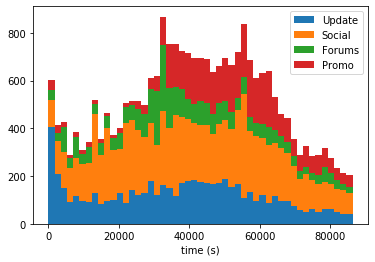

In [8]:
bins = np.linspace(0,max(times),50)
plt.hist([pr,up,so,fo],bins = bins, stacked=True)
plt.legend(["Update", "Social", "Forums", "Promo"])
plt.xlabel("time (s)")
plt.savefig("time.png")

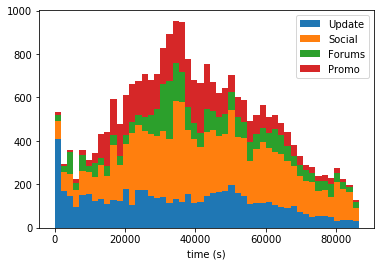

In [9]:
up2 =list(compress(times2, lab == 0))
so2 =list(compress(times2, lab == 1))
fo2 =list(compress(times2, lab == 2))
pr2 =list(compress(times2, lab == 3))
bins = np.linspace(0,max(times),50)
x,y,_ = plt.hist([pr2,up2,so2,fo2],bins = bins, stacked=True)
plt.legend(["Update", "Social", "Forums", "Promo"])
plt.xlabel("time (s)")
plt.savefig("time.png")

In [10]:
xm = x[1].argmax(axis=0)
print(xm)
y[xm]/3600

19


9.304829931972789

In [11]:
df["seconds"] = times

In [12]:
print(df.columns)

Index(['Id', 'date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images',
       'urls', 'salutations', 'designation', 'chars_in_subject',
       'chars_in_body', 'label', 'time_tz_corr', 'time', 'weekdays_tz_corr',
       'weekdays', 'seconds'],
      dtype='object')


Text(0.5, 0, 'Day')

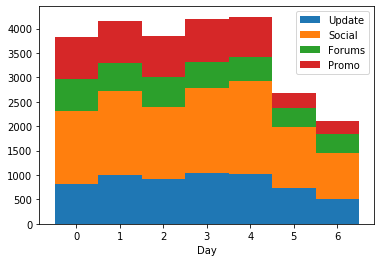

In [13]:
upd =list(compress(days2, lab == 0))
sod =list(compress(days2, lab == 1))
fod =list(compress(days2, lab == 2))
prd =list(compress(days2, lab == 3))

dbins = np.linspace(-0.5,6.5,8)

plt.hist([prd,upd,sod,fod],bins = dbins, stacked=True)
plt.legend(["Update", "Social", "Forums", "Promo"])
plt.xlabel("Day")

Text(0.5, 0, 'Day')

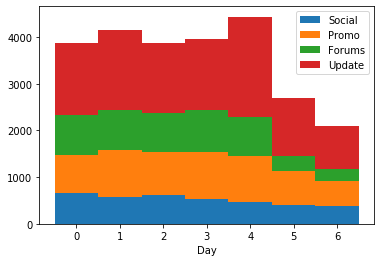

In [14]:
upd1 =list(compress(days1, lab == 0))
sod1 =list(compress(days1, lab == 1))
fod1 =list(compress(days1, lab == 2))
prd1 =list(compress(days1, lab == 3))

dbins = np.linspace(-0.5,6.5,8)

plt.hist([sod1,prd1,fod1,upd1],bins = dbins, stacked=True)
plt.legend(["Social", "Promo", "Forums", "Update"])
plt.xlabel("Day")

In [41]:
def hists(data, labels,bins = [], order = range(4)):
    
    u =list(compress(data, labels == 0))
    s =list(compress(data, labels == 1))
    f =list(compress(data, labels == 2))
    p =list(compress(data, labels == 3))
    
    c = np.array(["tab:blue","tab:orange","tab:green","tab:red"])[order]
    
    pl = np.array([u,s,f,p])[order]
    
    if len(bins) > 0:
        plt.hist(pl, bins = bins,stacked=True, color = c)
    else:
        plt.hist([u,s,f,p],stacked = True, color = c)
    leg = np.array(["Update","Social","Forum","Promo"])
    plt.legend(leg[order])

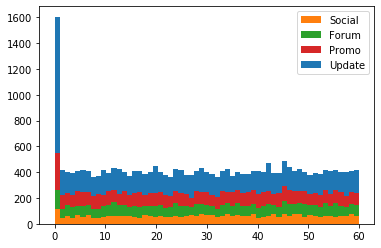

In [42]:
bins = np.linspace(0,60,60)
order = [1,2,3,0]
hists(secs,lab,bins = bins, order = order)

In [ ]:
secs